# Project: Wrangling and Analyze Data

In [90]:
import pandas as pd
import zipfile
import os
import requests
import json
import numpy as np

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [91]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [92]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

response = requests.get(image_predictions_url)
with open(os.path.join(folder_name, image_predictions_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [93]:
image_predictions = pd.read_csv(r'data\image-predictions.tsv', sep='\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import tweepy
import time

consumer_key = 'HIDDENKEY'
consumer_secret = 'HIDDENKEY'
access_token = 'HIDDENKEY'
access_secret = 'HIDDENKEY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_id = twitter_archive.tweet_id

start_time = time.time()

with open('tweet_json.txt', mode='a') as file:
    for tweet in tweet_id:
        try:
            tweet_status = api.get_status(tweet, tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
        except Exception as e:
            print("No tweet found: {} with error {}".format(str(tweet), str(e)))

end_time = time.time()
print(end_time - start_time)

No tweet found: 888202515573088257 with error 404 Not Found
144 - No status found with that ID.


KeyboardInterrupt: 

In [94]:
dict_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        dict_list.append({'tweet_id' : json_data['id'],
                         'retweet_count' : json_data['retweet_count'],
                         'favorite_count' : json_data['favorite_count'],
                         'created_at' : json_data['created_at']})

tweet_data = pd.DataFrame(dict_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'created_at'])
        

In [95]:
tweet_data.head()

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           7094           34192   
1  892177421306343426           5345           29653   
2  891815181378084864           3518           22324   
3  891689557279858688           7295           37366   
4  891327558926688256           7833           35713   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [96]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [97]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [98]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [99]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [100]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [101]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [102]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [103]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [104]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [105]:
twitter_archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
54    881666595344535552                    NaN                  NaN   
615   796563435802726400                    NaN                  NaN   
992   748692773788876800                    NaN                  NaN   
2080  670823764196741120                    NaN                  NaN   
293   837820167694528512                    NaN                  NaN   
927   754856583969079297                    NaN                  NaN   
496   813157409116065792                    NaN                  NaN   
1224  714214115368108032                    NaN                  NaN   
1653  683462770029932544                    NaN                  NaN   
1084  738402415918125056                    NaN                  NaN   
320   834458053273591808                    NaN                  NaN   
1260  710269109699739648                    NaN                  NaN   
1573  687494652870668288                    NaN                  NaN   
1018  746818907684614144           6.914169e+17         4.196984e+09   
860   763167063695355904                    NaN                  NaN   
122   869227993411051520                    NaN                  NaN   
2076  670838202509447168                    NaN                  NaN   
903   758405701903519748                    NaN                  NaN   
622   796080075804475393                    NaN                  NaN   
859   763183847194451968                    NaN                  NaN   

                      timestamp  \
54    2017-07-03 00:11:11 +0000   
615   2016-11-10 04:01:37 +0000   
992   2016-07-01 01:40:41 +0000   
2080  2015-11-29 04:37:03 +0000   
293   2017-03-04 00:21:08 +0000   
927   2016-07-18 01:53:28 +0000   
496   2016-12-25 23:00:08 +0000   
1224  2016-03-27 22:14:49 +0000   
1653  2016-01-03 01:39:57 +0000   
1084  2016-06-02 16:10:29 +0000   
320   2017-02-22 17:41:18 +0000   
1260  2016-03-17 00:58:46 +0000   
1573  2016-01-14 04:41:12 +0000   
1018  2016-06-25 21:34:37 +0000   
860   2016-08-10 00:16:21 +0000   
122   2017-05-29 16:24:37 +0000   
2076  2015-11-29 05:34:25 +0000   
903   2016-07-27 20:56:24 +0000   
622   2016-11-08 20:00:55 +0000   
859   2016-08-10 01:23:03 +0000   

                                                 source  \
54    <a href="http://twitter.com/download/iphone" r...   
615   <a href="http://twitter.com/download/iphone" r...   
992   <a href="http://twitter.com/download/iphone" r...   
2080  <a href="http://twitter.com/download/iphone" r...   
293   <a href="http://twitter.com/download/iphone" r...   
927   <a href="http://twitter.com/download/iphone" r...   
496   <a href="http://twitter.com/download/iphone" r...   
1224  <a href="http://twitter.com/download/iphone" r...   
1653  <a href="http://twitter.com/download/iphone" r...   
1084  <a href="http://twitter.com/download/iphone" r...   
320   <a href="http://twitter.com/download/iphone" r...   
1260  <a href="http://twitter.com/download/iphone" r...   
1573  <a href="http://twitter.com/download/iphone" r...   
1018  <a href="http://twitter.com/download/iphone" r...   
860   <a href="http://twitter.com/download/iphone" r...   
122   <a href="http://twitter.com/download/iphone" r...   
2076  <a href="http://twitter.com/download/iphone" r...   
903   <a href="http://twitter.com/download/iphone" r...   
622   <a href="http://twitter.com/download/iphone" r...   
859   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
54    This is Gary. He couldn't miss this puppertuni...                  NaN   
615   RT @dog_rates: I want to finally rate this ico...         7.809316e+17   
992   That is Quizno. This is his beach. He does not...                  NaN   
2080  This is Remington. He's a man dime. 12/10 http...                  NaN   
293   Here's a pupper before and after being asked "...                  NaN   
927   This is Winnie. She's not a fan of the fa

In [106]:
twitter_archive.text.value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                      1
Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN       1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                               1
With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP                                                                        1
Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy    1
                                                                                                                                                  ..
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                        

In [107]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [108]:
sum(twitter_archive.duplicated())

0

In [109]:
sum(twitter_archive.tweet_id.duplicated())

0

In [110]:
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [111]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [112]:
sum(image_predictions.duplicated())

0

In [113]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [114]:
tweet_data

tweet_id  retweet_count  favorite_count  \
0     892420643555336193           7094           34192   
1     892177421306343426           5345           29653   
2     891815181378084864           3518           22324   
3     891689557279858688           7295           37366   
4     891327558926688256           7833           35713   
...                  ...            ...             ...   
2393  879376492567855104           2673           15017   
2394  879130579576475649           5797               0   
2395  879050749262655488           3990           20054   
2396  879008229531029506           2269           16975   
2397  878776093423087618           3483           17340   

                          created_at  
0     Tue Aug 01 16:23:56 +0000 2017  
1     Tue Aug 01 00:17:27 +0000 2017  
2     Mon Jul 31 00:18:03 +0000 2017  
3     Sun Jul 30 15:58:51 +0000 2017  
4     Sat Jul 29 16:00:24 +0000 2017  
...                              ...  
2393  Mon Jun 26 16:31:08 +0000 2017  
2394  Mon Jun 26 00:13:58 +0000 2017  
2395  Sun Jun 25 18:56:45 +0000 2017  
2396  Sun Jun 25 16:07:47 +0000 2017  
2397  Sun Jun 25 00:45:22 +0000 2017  

[2398 rows x 4 columns]

In [115]:
tweet_data.describe()

tweet_id  retweet_count  favorite_count
count  2.398000e+03    2398.000000     2398.000000
mean   7.460408e+17    2596.008757     7691.584237
std    7.146058e+16    4306.818460    11696.422538
min    6.660209e+17       1.000000        0.000000
25%    6.787691e+17     512.000000     1273.750000
50%    7.248777e+17    1229.500000     3207.500000
75%    8.055123e+17    3052.750000     9597.250000
max    8.924206e+17   71610.000000   146369.000000

In [116]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2398 non-null   int64 
 1   retweet_count   2398 non-null   int64 
 2   favorite_count  2398 non-null   int64 
 3   created_at      2398 non-null   object
dtypes: int64(3), object(1)
memory usage: 75.1+ KB


### Quality issues
1. need to remove retweets as per instruction

2. missing rows for 'twitter_archive' table, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",  "retweeted_status_user_id", "retweeted_status_timestamp",

3. erroneous datatypes for 'twitter_archive' table, timestamp should be datetime 

4. missing names for 'twitter_archive' table, multiple dogs named 'a', dogs named 'None' 

5. inconsistent names for 'image_predictions' table, lowercase names in p1, p2, p3 

6. erroneous datatypes for 'tweet_data' table, created_at should be datetime 

7. source column for 'twitter_archive' has html tags 

8. text column contains hyperlinks for 'twitter_archive' 

### Tidiness issues
1. dog size should be in one column "doggo, fluffer, puppo.." 

2. we only need one table, columns from 'twitter_archive', 'tweet_data' and 'image_predictions' should be merged together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [117]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_data_clean = tweet_data.copy()
image_predictions_clean = image_predictions.copy()

### Issue #1: need to remove retweets

#### Define: before we can drop the rows we need to remove all the retweets in the dataset as stated in the instructions

In [118]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code

In [119]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [120]:
twitter_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Issue #2: drop missing rows

#### Define: before we can drop the rows we need to remove all the retweets in the dataset as stated in the instructions

#### Code

In [121]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [122]:
twitter_archive_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Issue #3: missing names for 'twitter_archive' table, multiple dogs named 'a', dogs named 'None'

#### Define: since all the dog names we know are uppercase we can use this advantage to sort through all the lowercase values and set them to NaNs

#### Code

In [123]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [124]:
mask = twitter_archive_clean.name.str.islower() 
column_name = 'name' 
twitter_archive_clean.loc[mask, column_name] = np.nan

#### Test

In [125]:
sum(twitter_archive_clean['name'].str.islower())

nan

In [126]:
twitter_archive_clean.name.value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Issue #4: dog maturity should be in one column "doggo, fluffer, puppo..." 

#### Define: we will concatenate the columns in order to combine these variables into one column called maturity, then we will concatenate the 6 columns into prediction and confidence respectively

In [127]:
twitter_archive_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas  None    None   None  None  
1                     10     Tilly  None    None   None  None  
2                     10    Archie  None    None   None  None  
3                     10     Darla  None    None   None  None  
4                     10  Franklin  None    None   None  None  
...                  ...       ...   ...     ...    ...   ...  
2351                  10      None  None    None   None  None  
2352                  10       NaN  None    None   None  None  
2353                  10       NaN  None    None   None  None  
2354                  10       NaN  None    None   None  None  
2355                  10      None  None    None   None  None  

[2175 rows x 12 columns]

In [128]:
image_predictions_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

#### Code

In [129]:
def replacement(df):
    df.replace(np.NaN, '', inplace=True)
    df.replace('None', '', inplace=True)
    
    return df

In [130]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(replacement, axis=1)

In [131]:
maturity_cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean['maturity'] = twitter_archive_clean[maturity_cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [132]:
twitter_archive_clean.loc[twitter_archive_clean.maturity == 'doggopupper', 'maturity'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.maturity == 'doggopuppo', 'maturity'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.maturity == 'doggofloofer', 'maturity'] = 'doggo,floofer'

In [133]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [134]:
twitter_archive_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name maturity  
0                     10   Phineas           
1                     10     Tilly           
2                     10    Archie           
3                     10     Darla           
4                     10  Franklin           
...                  ...       ...      ...  
2351                  10      None           
2352                  10       NaN           
2353                  10       NaN           
2354                  10       NaN           
2355                  10      None           

[2175 rows x 9 columns]

In [135]:
twitter_archive_clean['maturity'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: maturity, dtype: int64

### Issue #5: we only need one table, columns from 'twitter_archive' and 'tweet_data' , and 'image_predictions' should all be merged together

#### Define: we need to use joins/merges on tweet_id in order to obtain our master dataset

In [136]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [137]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2398 non-null   int64 
 1   retweet_count   2398 non-null   int64 
 2   favorite_count  2398 non-null   int64 
 3   created_at      2398 non-null   object
dtypes: int64(3), object(1)
memory usage: 75.1+ KB


In [138]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2071 non-null   object
 8   maturity            2175 non-null   object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


#### Code

In [139]:
merged_df1 = pd.merge(twitter_archive_clean, tweet_data_clean, on='tweet_id', how='left')

In [140]:
master_clean = pd.merge(merged_df1, image_predictions, on='tweet_id', how='left')

In [141]:
master_clean = master_clean.drop_duplicates()

#### Test

In [142]:
sum(master_clean.duplicated())

0

In [143]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 0 to 2242
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2238 non-null   int64  
 1   timestamp           2238 non-null   object 
 2   source              2238 non-null   object 
 3   text                2238 non-null   object 
 4   expanded_urls       2180 non-null   object 
 5   rating_numerator    2238 non-null   int64  
 6   rating_denominator  2238 non-null   int64  
 7   name                2132 non-null   object 
 8   maturity            2238 non-null   object 
 9   retweet_count       2230 non-null   float64
 10  favorite_count      2230 non-null   float64
 11  created_at          2230 non-null   object 
 12  jpg_url             2055 non-null   object 
 13  img_num             2055 non-null   float64
 14  p1                  2055 non-null   object 
 15  p1_conf             2055 non-null   float64
 16  p1_dog

In [144]:
master_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892420643555336193  2017-08-01 16:23:56 +0000   
2     892177421306343426  2017-08-01 00:17:27 +0000   
3     892177421306343426  2017-08-01 00:17:27 +0000   
4     891815181378084864  2017-07-31 00:18:03 +0000   
...                  ...                        ...   
2238  666049248165822465  2015-11-16 00:24:50 +0000   
2239  666044226329800704  2015-11-16 00:04:52 +0000   
2240  666033412701032449  2015-11-15 23:21:54 +0000   
2241  666029285002620928  2015-11-15 23:05:30 +0000   
2242  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2238  <a href="http://twitter.com/download/iphone" r...   
2239  <a href="http://twitter.com/download/iphone" r...   
2240  <a href="http://twitter.com/download/iphone" r...   
2241  <a href="http://twitter.com/download/iphone" r...   
2242  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Phineas. He's a mystical boy. Only eve...   
2     This is Tilly. She's just checking pup on you....   
3     This is Tilly. She's just checking pup on you....   
4     This is Archie. He is a rare Norwegian Pouncin...   
...                                                 ...   
2238  Here we have a 1949 1st generation vulpix. Enj...   
2239  This is a purebred Piers Morgan. Loves to Netf...   
2240  Here is a very happy pup. Big fan of well-main...   
2241  This is a western brown Mitsubishi terrier. Up...   
2242  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892420643...                13   
2     https://twitter.com/dog_rates/status/892177421...                13   
3     https://twitter.com/dog_rates/status/892177421...                13   
4     https://twitter.com/dog_rates/status/891815181...                12   
...                                                 ...               ...   
2238  https://twitter.com/dog_rates/status/666049248...                 5   
2239  https://twitter.com/dog_rates/status/666044226...                 6   
2240  https://twitter.com/dog_rates/status/666033412...                 9   
2241  https://twitter.com/dog_rates/status/666029285...                 7   
2242  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator     name maturity  retweet_count  ...  img_num  \
0                     10  Phineas                  7094.0  ...      1.0   
1                     10  Phineas                  7090.0  ...      1.0   
2                     10    Tilly                  5345.0  ...      1.0   
3                     10    Tilly                  5345.0  ...      1.0   
4                     10   Archie                  3518.0  ...      1.0   
...                  ...      ...      ...            ...  ...      ...   
2238                  10     None                    37.0  ...      1.0   
2239                  10      NaN                   117.0  ...      1.0   
2240                  10      NaN                    36.0  ...      1.0   
2241                  10      NaN                    39.0  ...      1.0   
2242                  10     None                   427.0  ...      1.0   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
0                     orange  0

### Issue #6: erroneous datatypes for 'twitter_archive' table, timestamp should be datetime

#### Define: we will use to_datetime to convert 'timestamp' to datetime

#### Code 

In [145]:
master_clean.timestamp = pd.to_datetime(master_clean.timestamp)

#### Test 

In [146]:
master_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #7: inconsistent names for 'image_predictions' table, lowercase names in p1, p2, p3

#### Define: we need consistency in the names for the predictions, we will keep everything lowercase for clarity

#### Code 

In [147]:
master_clean.p1 = master_clean.p1.str.lower()
master_clean.p2 = master_clean.p2.str.lower()
master_clean.p3 = master_clean.p3.str.lower()

#### Test 

In [148]:
master_clean[['p1', 'p2', 'p3']]

p1                  p2                   p3
0                     orange               bagel               banana
1                     orange               bagel               banana
2                  chihuahua            pekinese             papillon
3                  chihuahua            pekinese             papillon
4                  chihuahua            malamute               kelpie
...                      ...                 ...                  ...
2238      miniature_pinscher          rottweiler             doberman
2239     rhodesian_ridgeback             redbone   miniature_pinscher
2240         german_shepherd            malinois           bloodhound
2241                 redbone  miniature_pinscher  rhodesian_ridgeback
2242  welsh_springer_spaniel              collie    shetland_sheepdog

[2238 rows x 3 columns]

### Issue #8: erroneous datatypes for 'tweet_data' table, created_at should be datetime

#### Define: we will use to_datetime to convert 'created_at' to datetime

#### Code 

In [149]:
master_clean.created_at.dtype

dtype('O')

In [150]:
master_clean.created_at = pd.to_datetime(master_clean.created_at)

#### Test

In [151]:
master_clean.created_at.dtype

datetime64[ns, UTC]

### Issue #9: source column for 'twitter_archive' has html tags

#### Define: we wil extract any html tags using a regex function to remove any html

#### Code 

In [152]:
import re

In [153]:
def remove_html_tags(string):
    return re.sub('<.*?>','',string)


In [154]:
master_clean.source = master_clean.source.apply(lambda x: remove_html_tags(x))

#### Test 

In [155]:
master_clean.source.value_counts()

Twitter for iPhone     2105
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #10: text column contains hyperlinks for 'twitter_archive'

#### Define: we will create a function with a hyperlink regex in similar fashion to remove all hyperlinks from text column

#### Code

In [156]:
def remove_hyperlink(string):
    return re.sub('(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])', '', string)

In [157]:
master_clean.text = master_clean.text.apply(lambda x: remove_hyperlink(x))

#### Test 

In [158]:
master_clean.text.value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                     2
This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko     2
This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl                                             2
This is Lola. It's her first time outside. Must test the earth and taste the atmosphere. 13/10 you're doing great Lola                    2
This is Kevin. He's just so happy. 13/10 what is your secret Kevin                                                                        2
                                                                                                                                         ..
This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af                                                         1
When you hear your o

### Final check of dataset:

In [159]:
master_clean

tweet_id                 timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1     892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
2     892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
3     892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
4     891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
...                  ...                       ...                 ...   
2238  666049248165822465 2015-11-16 00:24:50+00:00  Twitter for iPhone   
2239  666044226329800704 2015-11-16 00:04:52+00:00  Twitter for iPhone   
2240  666033412701032449 2015-11-15 23:21:54+00:00  Twitter for iPhone   
2241  666029285002620928 2015-11-15 23:05:30+00:00  Twitter for iPhone   
2242  666020888022790149 2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Phineas. He's a mystical boy. Only eve...   
2     This is Tilly. She's just checking pup on you....   
3     This is Tilly. She's just checking pup on you....   
4     This is Archie. He is a rare Norwegian Pouncin...   
...                                                 ...   
2238  Here we have a 1949 1st generation vulpix. Enj...   
2239  This is a purebred Piers Morgan. Loves to Netf...   
2240  Here is a very happy pup. Big fan of well-main...   
2241  This is a western brown Mitsubishi terrier. Up...   
2242  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892420643...                13   
2     https://twitter.com/dog_rates/status/892177421...                13   
3     https://twitter.com/dog_rates/status/892177421...                13   
4     https://twitter.com/dog_rates/status/891815181...                12   
...                                                 ...               ...   
2238  https://twitter.com/dog_rates/status/666049248...                 5   
2239  https://twitter.com/dog_rates/status/666044226...                 6   
2240  https://twitter.com/dog_rates/status/666033412...                 9   
2241  https://twitter.com/dog_rates/status/666029285...                 7   
2242  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator     name maturity  retweet_count  ...  img_num  \
0                     10  Phineas                  7094.0  ...      1.0   
1                     10  Phineas                  7090.0  ...      1.0   
2                     10    Tilly                  5345.0  ...      1.0   
3                     10    Tilly                  5345.0  ...      1.0   
4                     10   Archie                  3518.0  ...      1.0   
...                  ...      ...      ...            ...  ...      ...   
2238                  10     None                    37.0  ...      1.0   
2239                  10      NaN                   117.0  ...      1.0   
2240                  10      NaN                    36.0  ...      1.0   
2241                  10      NaN                    39.0  ...      1.0   
2242                  10     None                   427.0  ...      1.0   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
0                     orange  0.097049   False               bagel  0.085851   
1                     orange  0.097049   False               bagel  0.085851   
2                  chihuahua  0.323581    True            pekinese  0.090647   
3                  chihuahua  0.323581    True            pekinese  0.090647   
4                  chihuahua  0.716012    True            malamute  0.078253   
...                      ...       ...     ...                 ...       ...   
2238      miniature_pinscher  0.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [160]:
master_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [161]:
df = pd.read_csv('twitter_archive_master.csv')

### Questions that i've pondered:

1. **What is the most favorited tweet?**

2. **What are the most common breeds predicted first by the neural network?**

3. **What are the most common dog names?** 

In [162]:
df.groupby(['tweet_id', 'text'])['favorite_count'].agg(max).sort_values(ascending=False)

tweet_id            text                                                                                                                                        
744234799360020481  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)                                                     146369.0
822872901745569793  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10                                                         125491.0
807106840509214720  This is Stephan. He just wants to help. 13/10 such a good boy                                                                                   112991.0
866450705531457537  This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender                                      110087.0
739238157791694849  Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)             

In [163]:
df.p1.value_counts()

golden_retriever      146
labrador_retriever     96
pembroke               94
chihuahua              83
pug                    57
                     ... 
timber_wolf             1
espresso                1
bib                     1
hotdog                  1
desktop_computer        1
Name: p1, Length: 374, dtype: int64

In [164]:
df.name.value_counts()

None          692
Oliver         11
Charlie        11
Lucy           11
Cooper         10
             ... 
Brandonald      1
Corey           1
Leonard         1
Beckham         1
Christoper      1
Name: name, Length: 931, dtype: int64

### Insights:
1. The most common dog names are Charlie and Oliver, followed by Lola, Cooper, and Lucy.

2. The most common dog breeds predicted by the neural network were the Golden Retriever, Pembroke, and Labrador Retriever.

3. Most favorited tweet was 'Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)' with a count of 146369 likes.

### Visualization

**Visualization of favorited breeds predicted first by the neural network**

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

favorite_breeds = df.groupby(['p1'])['favorite_count'].sum().nlargest(5)
favorite_breeds

p1
golden_retriever      1693584.0
pembroke              1077345.0
labrador_retriever     946143.0
chihuahua              712172.0
samoyed                551425.0
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Predictions')

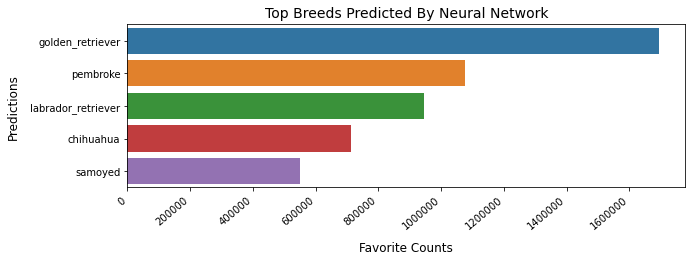

In [166]:
favorite_breeds = favorite_breeds.reset_index(drop=False)

plt.rcParams["figure.figsize"] = (10,3)
plt.title('Top Breeds Predicted By Neural Network', fontsize = 14, pad = 7.0)
ax = sns.barplot(y='p1', x='favorite_count', data=favorite_breeds)
plt.xticks(rotation=40, horizontalalignment='right', fontsize='medium')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Favorite Counts', fontsize = 12, labelpad = 10.0)
plt.ylabel('Predictions', fontsize = 12, labelpad = 10.0)